In [1]:
import pandas as pd
import numpy as np

In [2]:
# Join segmentation stats and age file

In [29]:
ages = './stats/HBN_noDx.csv'
segs = './stats/HBM_fastsurfer_aseg.volume.stats.dat'

In [30]:
age_df = pd.read_csv(ages)
age_df

,ID,year,sex,age,EHQ,release
0,NDARHV527DNK,2016.0,0,5.016997,8.94,1
1,NDAREW430AYU,2019.0,1,5.096851,13.34,8
2,NDARHJ945PV0,2017.0,0,5.140314,-17.81,2
3,NDARGL800LDW,2017.0,0,5.161989,13.34,1
4,NDAREM703YFD,2018.0,0,5.189368,100.00,3
...,...,...,...,...,...,...
327,NDARMY301WFK,2016.0,1,20.425507,100.00,1
328,NDARRU499DP2,2019.0,0,20.485854,73.34,7
329,NDARPJ151ERK,2019.0,1,20.664271,97.80,7
330,NDARXJ696AMX,2016.0,0,21.189368,84.47,1


In [59]:
age_df['ID'] = age_df.ID.astype('str').apply(lambda x: 'sub-' + x)

In [43]:
seg_df = pd.read_csv(segs, sep='\t| ')

/home/orco/anaconda3/envs/ventrikel/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [44]:
seg_df['ID'] = seg_df['Measure:volume'].astype('str')

### How many Subjects in the initial list:

In [45]:
len(age_df)

332

### How many Fastsurfer segmented subjects

In [46]:
len(seg_df)

216

### Join DataFrames

In [58]:
df = seg_df.join(age_df.set_index('ID'), on='ID')
df.head()

,Measure:volume,Unknown,Left-Cerebral-White-Matter,Left-Cerebral-Cortex,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,...,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,ID,year,sex,age,EHQ,release
0,sub-NDARAA075AMK,15584986.0,196446.0,0.0,3783.0,321.0,10743.0,55964.0,7538.0,3823.0,...,0.0,0.0,0.0,0.0,sub-NDARAA075AMK,2016.0,1,6.728040,65.54,1
1,sub-NDARAC904DMU,15688955.0,196439.0,0.0,1758.0,140.0,12940.0,56679.0,7880.0,3131.0,...,0.0,0.0,0.0,0.0,sub-NDARAC904DMU,2017.0,1,11.338580,71.14,1
2,sub-NDARAE012DGA,15563791.0,202121.0,0.0,7408.0,495.0,10360.0,53590.0,7284.0,3183.0,...,0.0,0.0,0.0,0.0,sub-NDARAE012DGA,2017.0,0,6.927903,100.00,1
3,sub-NDARAM277WZT,15664538.0,188775.0,0.0,2332.0,484.0,12044.0,55639.0,7065.0,3387.0,...,0.0,0.0,0.0,0.0,sub-NDARAM277WZT,2016.0,0,14.320670,NaN,1
4,sub-NDARAM675UR8,15706129.0,191942.0,0.0,2994.0,162.0,11110.0,56794.0,7833.0,3768.0,...,0.0,0.0,0.0,0.0,sub-NDARAM675UR8,2017.0,1,5.548482,53.34,2


### How Many columns only with zeros

In [23]:
for i in df.columns:
    if df[i].values.sum()==0:
        print(i)

Left-Cerebral-Cortex
Left-vessel
Right-Cerebral-Cortex
Right-vessel
5th-Ventricle
Left-WM-hypointensities
Right-WM-hypointensities
non-WM-hypointensities
Left-non-WM-hypointensities
Right-non-WM-hypointensities
Optic-Chiasm
CC_Posterior
CC_Mid_Posterior
CC_Central
CC_Mid_Anterior
CC_Anterior


<AxesSubplot:ylabel='Frequency'>

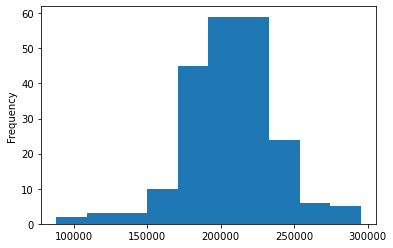

In [25]:
df['Left-Cerebral-White-Matter'].plot.hist()

<AxesSubplot:xlabel='age', ylabel='Left-Cerebral-White-Matter'>

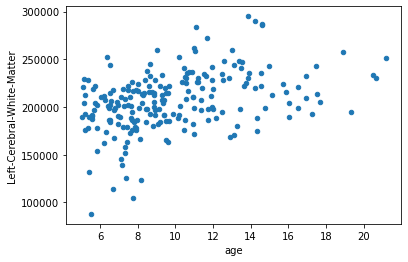

In [61]:
df.plot.scatter(y='Left-Cerebral-White-Matter',
               x='age')

In [98]:
o = dict()
n = dict()
s = dict()
for i in seg_df.columns:
    try:
        mean = df[i].values.mean()
        std = df[i].values.std()
        #print(i)
        outliers = (df[i].values <  mean - 2.698*std) | (df[i].values > mean + 2.698*std)
        #print(outliers.sum())
        o[i] = [j for j in df.ID.values * outliers if j]
        n[i] = outliers.sum()
        for sub in o:
            s[sub] += [i]
    except:
        pass

In [99]:
i = 'Right-Thalamus'
mean = df[i].values.mean()
std = df[i].values.std()

outliers = (df[i].values <  mean - 2.698*std) | (df[i].values > mean + 2.698*std)
outliers.sum()

6

In [100]:
[i for i in df.ID.values * outliers if i]

['sub-NDARFN854EJB',
 'sub-NDARHP924ZHW',
 'sub-NDARHX252NVH',
 'sub-NDARJV377HG4',
 'sub-NDARXT792GY8',
 'sub-NDARYK164AEJ']

In [101]:
l = []
for i in o.keys():
    l += o[i]

In [102]:
values, counts = np.unique(l, return_counts=True)

In [110]:
for i in zip(values,counts):
    print(i)

('sub-NDARAC904DMU', 1)
('sub-NDARBW268XPY', 2)
('sub-NDARDT800YVF', 1)
('sub-NDARFL411AT1', 2)
('sub-NDARFN854EJB', 23)
('sub-NDARGH592NZ2', 2)
('sub-NDARGH790CEF', 1)
('sub-NDARHP924ZHW', 14)
('sub-NDARHX252NVH', 19)
('sub-NDARJM708VGE', 2)
('sub-NDARJV377HG4', 15)
('sub-NDARJZ089HVP', 1)
('sub-NDARKH837TB2', 2)
('sub-NDARKT811ATJ', 2)
('sub-NDARKV482FU9', 1)
('sub-NDARLU111UYF', 1)
('sub-NDARMZ366UY8', 1)
('sub-NDARNH342XLK', 1)
('sub-NDARPH022TRY', 2)
('sub-NDARPZ621ZLE', 1)
('sub-NDARRZ653HKY', 1)
('sub-NDARUD764NFJ', 1)
('sub-NDARUF935UL3', 10)
('sub-NDARUG323DM3', 4)
('sub-NDARVE724GEF', 1)
('sub-NDARVG461LA2', 1)
('sub-NDARWR247CE1', 1)
('sub-NDARXT792GY8', 21)
('sub-NDARYH110YV9', 4)
('sub-NDARYH697TPA', 1)
('sub-NDARYK164AEJ', 7)
('sub-NDARZR529EJ1', 1)
('sub-NDARZV983XK9', 1)


In [112]:
pd.DataFrame(zip(values,counts)).to_csv('count_deviations_hist.csv')

In [105]:
pd.DataFrame.from_dict(o, orient='index').to_csv('outliers_dist_ROI.csv')

In [106]:
s

{}